In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scqubits as scq
from matplotlib import pyplot as plt
from labellines import labelLines

In [10]:
#fluxonium_031 = scq.Fluxonium.create()

In [128]:
def plot_transition_spectrum(phi_ext_list, eigval_list):
#     plt.figure(figsize=(8,5))
    fig, axes =plt.subplots()
    N = np.shape(eigval_list)[0]
    # probable transition:
    # 0-f, 1-f
    spectrum_list_0 = np.zeros((N-1, len(phi_ext_list)))
    spectrum_list_1 = np.zeros((N-2, len(phi_ext_list)))
    
    for i in range(N-1):
        spectrum_list_0[i] = eigval_list[i+1] - eigval_list[0]
    for i in range(N-2):
        spectrum_list_1[i] = eigval_list[i+2] - eigval_list[1]
        
    plt.xlabel(r"$\frac{\phi_{ext}}{2\pi}$", fontsize=20)
    plt.ylabel("Frequency(GHz)", fontsize=16)
    plt.title("Transition spectrum", fontsize=16)
    
    #plt.plot(phi_ext_list, spectrum_list_0[0], "k")
    #plt.plot(phi_ext_list, spectrum_list_1[2], "k")
    for idx in range(np.shape(spectrum_list_0)[0]):
        plt.plot(phi_ext_list, spectrum_list_0[idx],label=f"{idx+1},0")
        #if idx !=0:
            #plt.plot(phi_ext_list, spectrum_list_0[idx]/2,"--",label=f"{idx+1},0 2p")
            #plt.plot(phi_ext_list, spectrum_list_0[idx]/3,"--",label=f"{idx+1},0 3p")
            #plt.plot(phi_ext_list, spectrum_list_0[idx]/4,"--",label=f"{idx+1},0 4p")
    for idx in range(np.shape(spectrum_list_1)[0]):
        plt.plot(phi_ext_list, spectrum_list_1[idx], alpha=0.7,label=f"{idx+2},1")
        #if idx !=0:
            #plt.plot(phi_ext_list, spectrum_list_1[idx]/2,"-" ,alpha=0.7,label=f"{idx+2},1 2p")
            #plt.plot(phi_ext_list, spectrum_list_1[idx]/3,"-" ,alpha=0.7,label=f"{idx+2},1 3p")
            #plt.plot(phi_ext_list, spectrum_list_1[idx]/4,"-" ,alpha=0.7,label=f"{idx+2},1 4p")   
    labelLines(axes.get_lines(), zorder=1.5,align=False)

In [138]:
fluxonium_031 = scq.Fluxonium(
    EJ=6.25,
    EC=0.75,
    EL=0.91,
    cutoff = 30,
    flux = 0.5
)

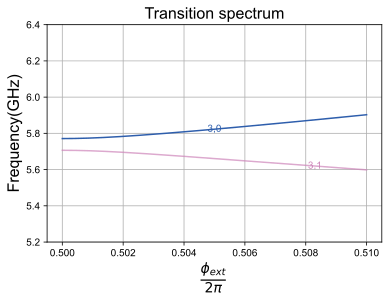

In [139]:
# %matplotlib notebook

flux_list = np.linspace(0.5, 0.51, 201)
eigval = fluxonium_031.get_spectrum_vs_paramvals("flux", flux_list, evals_count=4).energy_table
eigval = eigval.T

plot_transition_spectrum(flux_list, eigval)
# plt.xlim([0.49,0.5])
plt.ylim([5.2,6.4])
plt.grid()

In [121]:
help(labelLines)

Help on function labelLines in module labellines.core:

labelLines(lines=None, align=True, xvals=None, drop_label=False, shrink_factor=0.05, yoffsets=0, outline_color='auto', outline_width=5, **kwargs)
    Label all lines with their respective legends.
    
    Parameters
    ----------
    lines : list of matplotlib lines, optional.
       Lines to label. If empty, label all lines that have a label.
    align : boolean, optional
       If True, the label will be aligned with the slope of the line
       at the location of the label. If False, they will be horizontal.
    xvals : (xfirst, xlast) or array of float, optional
       The location of the labels. If a tuple, the labels will be
       evenly spaced between xfirst and xlast (in the axis units).
    drop_label : bool, optional
       If True, the label is consumed by the function so that subsequent
       calls to e.g. legend do not use it anymore.
    shrink_factor : double, optional
       Relative distance from the edges to 